In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
import numpy as np
from sklearn import ensemble 
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC

In [2]:
def unpickle(file):
    import pickle
    with open(file, 'rb') as fo:
        dict = pickle.load(fo, encoding='bytes')
    return dict

In [63]:
classes = unpickle('batches.meta')
classes_arr = [str(i.decode('utf-8')) for i in classes[b'label_names']]
classes_arr

['airplane',
 'automobile',
 'bird',
 'cat',
 'deer',
 'dog',
 'frog',
 'horse',
 'ship',
 'truck']

In [59]:
data = np.empty([0,3072])
labels = np.empty([0])
for i in range(1,6):
    name = 'data_batch_' + str(i)
    d = unpickle(name)
    labels = np.concatenate((d[b'labels'], labels) ,axis = 0)
    data = np.concatenate((d[b'data'], data) ,axis = 0)
print(data.shape, labels.shape)
print(labels)

(50000, 3072) (50000,)
[1. 8. 5. ... 1. 1. 5.]


In [3]:
'''d = unpickle('data_batch_1')
print(d.keys())'''

dict_keys([b'batch_label', b'labels', b'data', b'filenames'])


In [21]:
x = data
y = labels
x_images = x.reshape(-1, 32,32)
print(x.shape, y.shape, x_images.shape)

(50000, 3072) (50000,) (150000, 32, 32)


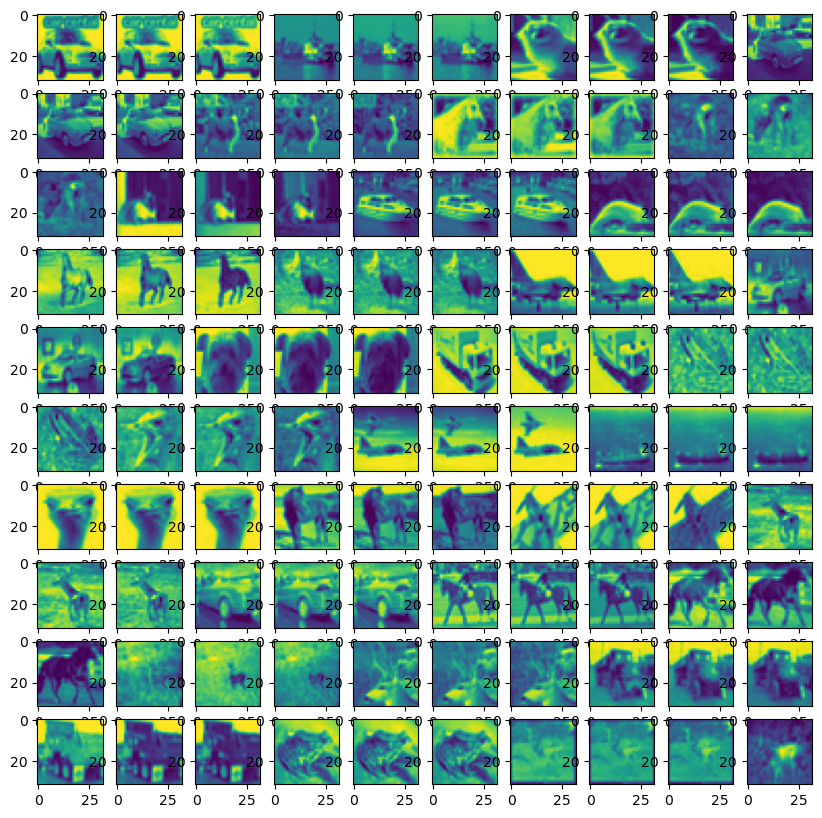

In [22]:
fig = plt.figure(figsize = (10,10))
for i in range(100):
    ax = fig.add_subplot(10,10,i+1)
    ax.imshow(x_images[i])
plt.show()

In [23]:
pca = PCA()
pca.fit(x)

PCA()

In [24]:
x_train, x_test, y_train, y_test = train_test_split(x, y, random_state =0)

In [25]:
k = 0
total = 0 
while total < 0.97:
    total  += (pca.explained_variance_ratio_[k])
    k+=1
k

335

In [26]:
pca_new = PCA(n_components = k)
x_transformed = pca_new.fit_transform(x_train)
x_transformed.shape

(37500, 335)

In [27]:
x_train_pca = x_transformed
x_test_pca = pca_new.transform(x_test)

In [28]:
clf = SVC(C= 3)
clf.fit(x_train_pca, y_train)

SVC(C=3)

In [29]:
clf.score(x_test_pca, y_test)

0.55312

In [49]:
x_test_final = unpickle('test_batch')
print(x_test_final.keys())
print(x_test_final[b'data'])

dict_keys([b'batch_label', b'labels', b'data', b'filenames'])
[[158 159 165 ... 124 129 110]
 [235 231 232 ... 178 191 199]
 [158 158 139 ...   8   3   7]
 ...
 [ 20  19  15 ...  50  53  47]
 [ 25  15  23 ...  80  81  80]
 [ 73  98  99 ...  94  58  26]]


In [51]:
y_pred = clf.predict(pca_new.transform(x_test_final[b'data']))

In [65]:
ans = [classes_arr[int(i)] for i in y_pred]
ans = np.array(ans)
np.savetxt('ans.csv', ans, fmt = '%s')